# Linear Regression - Eccomerce Customers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LinearRegression


%matplotlib inline

#### Data:
- email
- adress
- avatar
- avg. session length: Average session of in-store style advice sessions
- time on app: in minutes
- time on website: in minutes
- length of membership: in years
- yearly amount spent

In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.isnull().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

#### Exploratory data analysis

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


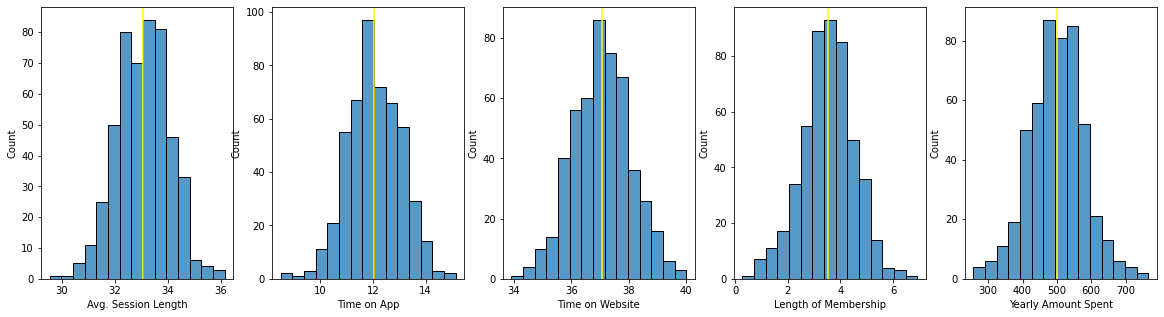

In [6]:
fig, axs = plt.subplots(ncols=5, figsize=(20,5))
sns.histplot(df['Avg. Session Length'], bins=15, stat='count', ax=axs[0])
axs[0].axvline(df['Avg. Session Length'].mean(), color='yellow')
sns.histplot(df['Time on App'], bins=15, stat='count', ax=axs[1])
axs[1].axvline(df['Time on App'].mean(), color='yellow')
sns.histplot(df['Time on Website'], bins=15, stat='count', ax=axs[2])
axs[2].axvline(df['Time on Website'].mean(), color='yellow')
sns.histplot(df['Length of Membership'], bins=15, stat='count', ax=axs[3])
axs[3].axvline(df['Length of Membership'].mean(), color='yellow')
sns.histplot(df['Yearly Amount Spent'], bins=15, stat='count', ax=axs[4])
axs[4].axvline(df['Yearly Amount Spent'].mean(), color='yellow')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pearson correlation coefficient:0.3550882947076431


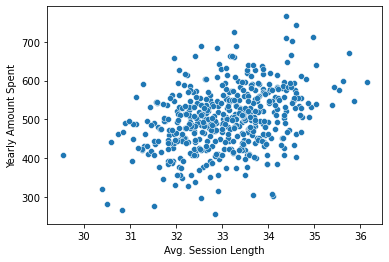

In [7]:
sns.scatterplot(df['Avg. Session Length'],df['Yearly Amount Spent'] )
r,p=stats.pearsonr(df['Avg. Session Length'],df['Yearly Amount Spent'] )
print(f'Pearson correlation coefficient:{r}')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pearson correlation coefficient:0.4993277700534504


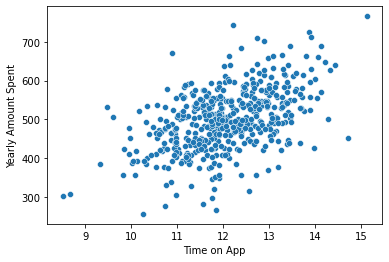

In [8]:
sns.scatterplot(df['Time on App'],df['Yearly Amount Spent'] )
r,p=stats.pearsonr(df['Time on App'],df['Yearly Amount Spent'] )
print(f'Pearson correlation coefficient:{r}')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pearson correlation coefficient:-0.00264084467215892


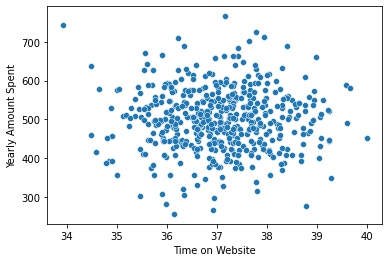

In [9]:
sns.scatterplot(df['Time on Website'],df['Yearly Amount Spent'] )
r,p=stats.pearsonr(df['Time on Website'],df['Yearly Amount Spent'] )
print(f'Pearson correlation coefficient:{r}')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Pearson correlation coefficient:0.8090835682475811


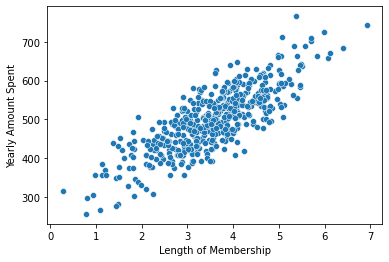

In [10]:
sns.scatterplot(df['Length of Membership'],df['Yearly Amount Spent'] )
r,p=stats.pearsonr(df['Length of Membership'],df['Yearly Amount Spent'] )
print(f'Pearson correlation coefficient:{r}')

The columns which has a higher correlation with the yearly ammout spent is the length of membership.
Time on app has a higher correlation with the amount spent than the time on the website which I find suprising. I would assume that they would have the same behaviour.

[]

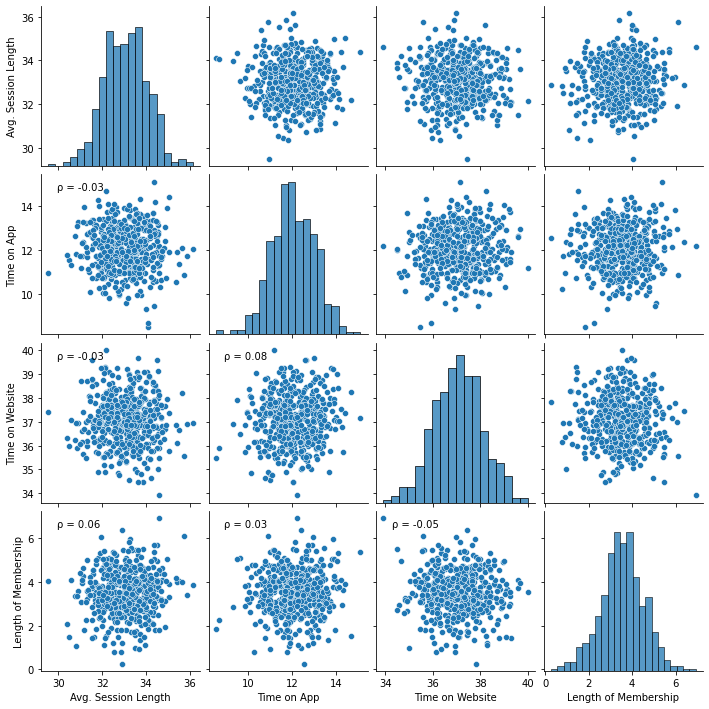

In [11]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = stats.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']])
g.map_lower(corrfunc)
plt.plot()

The correlation between the other varibles is low.

### Split data into training and testing data

In [12]:
X = df[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]
Y = df['Yearly Amount Spent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Train Data

In [14]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
print(lm.coef_)
print(lm.intercept_)

[25.59830981 38.760671    0.35007379 61.78665326]
-1044.990759054982


The highest coefficient is for the last feature 'Length of Membership'. The data should probabily be standardized to make conclusiong from the weights.

### Predict

In [17]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Y predicted')

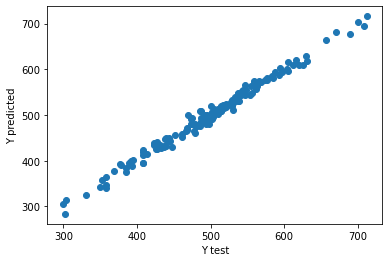

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Y predicted')

### Evaluate Model

In [19]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSA:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.123957067818407
MSA: 82.11562879812746
RMSE: 9.061767421321708


In [20]:
dataframe=pd.DataFrame(lm.coef_,X.columns)
dataframe.columns=['Coefficient']
dataframe

,Coefficient
Avg. Session Length,25.598310
Time on App,38.760671
Time on Website,0.350074
Length of Membership,61.786653


### Reapeat but making the data have mean 0 and standart deviation of 1

In [21]:
mm_scaler = preprocessing.StandardScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_2 = mm_scaler.transform(X_test)

In [22]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
print(lm2.coef_)
print(lm2.intercept_)

[25.31785539 37.57263545  0.35434059 61.29655775]
499.19848830008067


The weights for the features are similar between the two models. If we look at the mean an standard deviation for the inital features, the std is around 1 for all four and the mean values are in the same order of magnitude. So I guess, when standardizing the features, what we acompliched, was only a a shift by a similar amount for all the values? Which we can see since the only thing that had a bigger change was the bias?

In [26]:
predictions2=lm2.predict(X_test_2)

Text(0, 0.5, 'Y predicted')

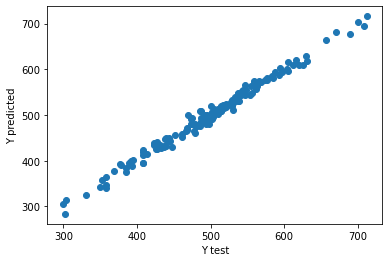

In [27]:
plt.scatter(y_test,predictions2)
plt.xlabel('Y test')
plt.ylabel('Y predicted')

In [28]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions2))
print('MSA:',metrics.mean_squared_error(y_test,predictions2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions2)))

MAE: 7.123957067818404
MSA: 82.11562879812732
RMSE: 9.061767421321699
